In [89]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [66]:
us_census = pd.read_csv("states0.csv")
for i in range(1,10):
    filename = "states" + str(i) + ".csv"
    df = pd.read_csv(filename)
    us_census = pd.concat([us_census,df])
    



In [67]:
us_census.drop_duplicates(keep = "first",inplace = True)


In [118]:
us_census.drop(columns = ["Unnamed: 0"], inplace = True)

In [68]:
new_index = list(range(len(us_census)))


In [69]:
us_census.index = new_index

In [76]:
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Male            int64
Female        float64
dtype: object

In [71]:
us_census["Income"] = us_census["Income"].str.replace("$","")
us_census["Hispanic"] = us_census["Hispanic"].str.replace("%","")
us_census["White"] = us_census["White"].str.replace("%","")
us_census["Black"] = us_census["Black"].str.replace("%","")
us_census["Native"] = us_census["Native"].str.replace("%","")
us_census["Asian"] = us_census["Asian"].str.replace("%","")
us_census["Pacific"] = us_census["Pacific"].str.replace("%","")

In [72]:
us_census[["Male","Female"]] = us_census["GenderPop"].str.split("_",expand = True)

In [73]:
us_census["Male"] = us_census["Male"].str.replace("M","")
us_census["Female"] = us_census["Female"].str.replace("F","")

In [119]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913.0,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135.0,19334329.0


In [79]:
us_census["Hispanic"] = pd.to_numeric(us_census["Hispanic"], downcast = None)
us_census["White"] = pd.to_numeric(us_census["White"], downcast = None)
us_census["Black"] = pd.to_numeric(us_census["Black"], downcast = None)
us_census["Native"] = pd.to_numeric(us_census["Native"], downcast = None)
us_census["Asian"] = pd.to_numeric(us_census["Asian"], downcast = None)
us_census["Pacific"] = pd.to_numeric(us_census["Pacific"], downcast = None)
us_census["Income"] = pd.to_numeric(us_census["Income"], downcast = None)
us_census["Male"] = pd.to_numeric(us_census["Male"], downcast = None)
us_census["Female"] = pd.to_numeric(us_census["Female"], downcast = 'signed')


In [91]:
us_census["Female"] = us_census["Female"].fillna(us_census["TotalPop"] - us_census["Male"])

In [121]:
us_census["Female"] = us_census["Female"].astype(int)

In [122]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
Male           int32
Female         int32
dtype: object

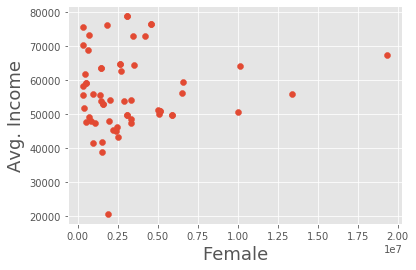

In [125]:
plt.scatter(us_census["Female"], us_census["Income"])
plt.xlabel("Female", size = 18)
plt.ylabel("Avg. Income", size = 18)
plt.show()

In [ ]:
df = round(us_census.loc[:,"Hispanic":"Pacific"].apply(lambda x: x*us_census["TotalPop"]/100))

In [131]:
df

,Hispanic,White,Black,Native,Asian,Pacific
0,181226.0,2989123.0,1509713.0,21894.0,50734.0,1659.0
1,43339.0,446700.0,20890.0,120208.0,39971.0,7764.0
2,1963747.0,3793869.0,255780.0,289260.0,191060.0,11134.0
3,183867.0,2104404.0,561135.0,15469.0,33793.0,4344.0
4,14328084.0,15451495.0,2181339.0,155719.0,5014859.0,135017.0
5,1097188.0,3689722.0,187210.0,30292.0,140524.0,NaN
6,1097188.0,3689722.0,187210.0,30292.0,140524.0,NaN
7,560716.0,2431787.0,371829.0,4535.0,144519.0,668.0
8,81757.0,598792.0,192183.0,2407.0,30283.0,NaN
9,59348.0,214343.0,335245.0,1299.0,21906.0,192.0


In [134]:
df.isnull().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [137]:
df.fillna(method = "bfill", inplace = True)

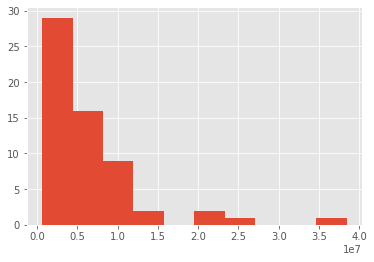

In [95]:
plt.style.use('ggplot')
plt.hist(us_census["TotalPop"], bins = 10)
plt.show()

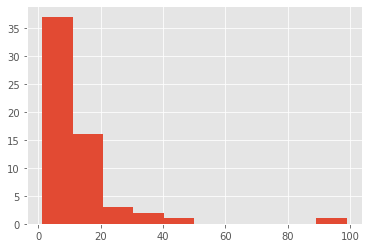

In [96]:
plt.style.use('ggplot')
plt.hist(us_census["Hispanic"], bins = 10)
plt.show()

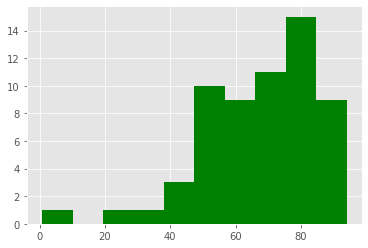

In [103]:
plt.style.use('ggplot')
plt.hist(us_census["White"], bins = 10, color = "green")
plt.show()

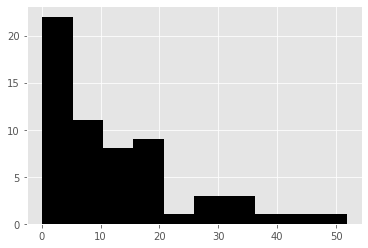

In [101]:
plt.hist(us_census["Black"], bins = 10, color = "black")
plt.show()

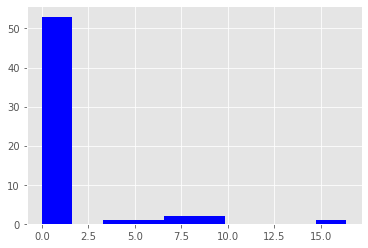

In [104]:
plt.hist(us_census["Native"], bins = 10, color = "blue")
plt.show()

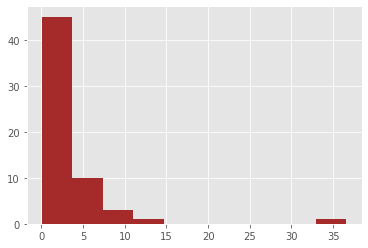

In [105]:
plt.hist(us_census["Asian"], bins = 10, color = "brown")
plt.show()

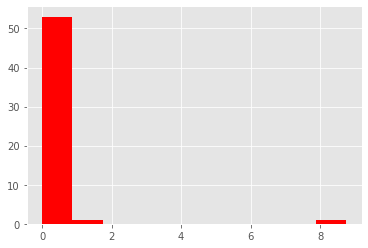

In [107]:
plt.hist(us_census["Pacific"], bins = 10, color = "red")
plt.show()

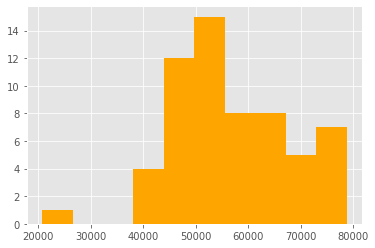

In [109]:
plt.hist(us_census["Income"], bins = 10, color = "orange")
plt.show()

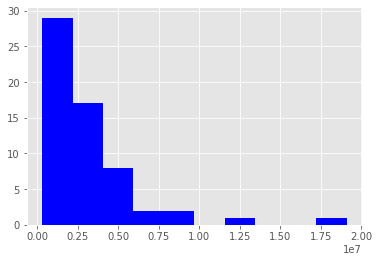

In [113]:
plt.hist(us_census["Male"], bins = 10, color = "blue")
plt.show()

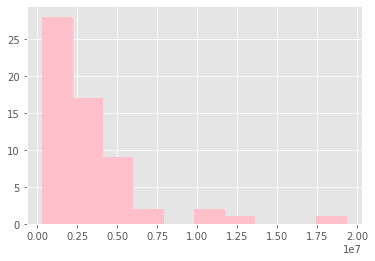

In [112]:
plt.hist(us_census["Female"], bins = 10, color = "pink")
plt.show()